# The objective of this notebook is to make an exploratory data analysis (EDA) of the Buenos Aires Road Accidents Homicides Data

## The first step is to read the raw data given, imputate missing values and duplicates

### homicidios.xlsx File

#### `HECHOS` Sheet

In [2]:
import pandas as pd
df_hom = pd.read_excel('raw_data/homicidios.xlsx',sheet_name='HECHOS')
df_hom

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


##### Check for NaN

In [3]:
import numpy as np
df_hom.replace('SD',np.nan,inplace=True)
df_hom.replace('.',np.nan,inplace=True)

In [4]:
df_hom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   695 non-null    object        
 7   HH                     695 non-null    float64       
 8   LUGAR_DEL_HECHO        695 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

There is just 1 NaN in the `HORA` column, hence we are going to replace it with the average time of the whole dataset

In [5]:
df_hom['HORA'].fillna(pd.to_datetime(df_hom['HORA'].astype(str).str.slice(-8),format='mixed').mean().time().replace(microsecond=0),inplace=True)

##### Create Datetime Column

In [6]:
df_hom['datetime'] = pd.to_datetime(df_hom['FECHA'].astype(str).str.slice(0,10) + ' ' + df_hom['HORA'].astype(str).str.slice(-8))

##### Imputate `pos x` and `pos y` columns

In [7]:
df_hom_null = df_hom[df_hom['pos x'].isnull()]
df_hom_null

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,datetime
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20.0,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,13,Point (. .),NaN,NaN,MOTO-SD,MOTO,NaN,2016-04-20 20:00:00
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0.0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,NaN,4,Point (. .),NaN,NaN,MOTO-CARGAS,MOTO,CARGAS,2016-10-25 00:00:00
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20.0,NaN,CALLE,...,NaN,NaN,0,Point (. .),NaN,NaN,PEATON-SD,PEATON,NaN,2016-11-18 20:35:00
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0.0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .),NaN,NaN,SD-SD,NaN,NaN,2016-12-27 00:00:00
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9.0,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,...,NaN,"LUGONES, LEOPOLDO AV.",14,Point (. .),NaN,NaN,MOTO-CARGAS,MOTO,CARGAS,2017-04-10 09:00:00
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11.0,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,9,Point (. .),NaN,NaN,MOTO-CARGAS,MOTO,CARGAS,2017-04-28 11:08:08
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3.0,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,NaN,7,Point (. .),NaN,NaN,AUTO-AUTO,AUTO,AUTO,2017-05-01 03:47:47
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23.0,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,...,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),NaN,NaN,MOTO-PASAJEROS,MOTO,PASAJEROS,2017-11-19 23:22:17
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22.0,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,NaN,NaN,14,Point (. .),NaN,NaN,PEATON-AUTO,PEATON,AUTO,2018-04-21 22:15:00
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6.0,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,...,NaN,NaN,14,Point (. .),NaN,NaN,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO,2020-05-17 06:40:00


Try Using googlemaps API

In [8]:
import googlemaps
apikey = input('Enter GMaps API Key: ')
gmaps = googlemaps.Client(key=apikey)
coords = []
for d in df_hom_null['LUGAR_DEL_HECHO'].values:
    if type(d) == str:
        fd = d + ', Buenos Aires'
        r = gmaps.geocode(fd)[0]['geometry']['location']
        print(r)
        coords.append(r)
    else:
        coords.append(np.nan)


{'lat': -34.5484519, 'lng': -58.4385529}
{'lat': -34.6502095, 'lng': -58.3533029}
{'lat': -34.6281775, 'lng': -58.420338}
{'lat': -34.5484519, 'lng': -58.4385529}
{'lat': -34.640641, 'lng': -58.492535}
{'lat': -34.6692536, 'lng': -58.4755674}
{'lat': -34.6377039, 'lng': -58.3767848}
{'lat': -34.5484519, 'lng': -58.4385529}
{'lat': -34.5484519, 'lng': -58.4385529}
{'lat': -34.6633372, 'lng': -58.4932331}
{'lat': -34.6502095, 'lng': -58.3533029}


In [9]:
index = df_hom_null.index
for i in range(len(index)):
    if type(coords[i]) != float:
        df_hom.loc[index[i],'pos x'] = coords[i]['lng']
        df_hom.loc[index[i],'pos y'] = coords[i]['lat']

In [10]:
df_hom[df_hom['pos x'].isnull()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,datetime
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20.0,NaN,CALLE,...,NaN,NaN,0,Point (. .),NaN,NaN,PEATON-SD,PEATON,NaN,2016-11-18 20:35:00


There is not much we can do to make the imputation of that row

##### Drop Unnecesary Colums

In [11]:
df_hom.drop(columns=['FECHA','AAAA','MM','DD','HORA','HH','LUGAR_DEL_HECHO','Calle','Altura','Cruce','Dirección Normalizada','XY (CABA)','PARTICIPANTES'],inplace=True)
df_hom

,ID,N_VICTIMAS,TIPO_DE_CALLE,COMUNA,pos x,pos y,VICTIMA,ACUSADO,datetime
0,2016-0001,1,AVENIDA,8,-58.47533969,-34.68757022,MOTO,AUTO,2016-01-01 04:00:00
1,2016-0002,1,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO,PASAJEROS,2016-01-02 01:15:00
2,2016-0003,1,AVENIDA,1,-58.39040293,-34.63189362,MOTO,AUTO,2016-01-03 07:00:00
3,2016-0004,1,AVENIDA,8,-58.46503904,-34.68092974,MOTO,NaN,2016-01-10 00:00:00
4,2016-0005,1,AVENIDA,1,-58.38718297,-34.62246630,MOTO,PASAJEROS,2016-01-21 05:20:00
...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,AVENIDA,7,-58.43353773,-34.64561636,MOTO,AUTO,2021-12-13 17:10:00
692,2021-0094,1,AUTOPISTA,9,-58.46739825,-34.65117757,MOTO,AUTO,2021-12-20 01:10:00
693,2021-0095,1,AVENIDA,11,-58.47293407,-34.61984745,MOTO,CARGAS,2021-12-30 00:43:00
694,2021-0096,1,AVENIDA,9,-58.47066794,-34.65021673,AUTO,CARGAS,2021-12-15 10:30:00


##### Check for Duplicates

In [12]:
sum(df_hom.duplicated())

0

##### Last check and save DataFrame

In [13]:
df_hom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             696 non-null    object        
 1   N_VICTIMAS     696 non-null    int64         
 2   TIPO_DE_CALLE  696 non-null    object        
 3   COMUNA         696 non-null    int64         
 4   pos x          695 non-null    object        
 5   pos y          695 non-null    object        
 6   VICTIMA        687 non-null    object        
 7   ACUSADO        673 non-null    object        
 8   datetime       696 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 49.1+ KB


In [14]:
df_hom.to_csv('data/df_homicides.csv',index=False)

#### `VICTIMAS` Sheet

In [15]:
import pandas as pd
df_vic = pd.read_excel('raw_data/homicidios.xlsx',sheet_name='VICTIMAS')
df_vic

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


##### Check for NaN

In [16]:
import numpy as np
df_vic.replace('SD',np.nan,inplace=True)

In [17]:
df_vic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  706 non-null    object        
 6   VICTIMA              708 non-null    object        
 7   SEXO                 711 non-null    object        
 8   EDAD                 664 non-null    float64       
 9   FECHA_FALLECIMIENTO  649 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 56.1+ KB


Check Specifically the `VICTIMA` Column

In [18]:
victima_dfhom = []
for id in df_vic['ID_hecho']:
    victima_dfhom = victima_dfhom + list(df_hom[df_hom['ID']==id]['VICTIMA'].values)
len(victima_dfhom)

717

In [19]:
ids_nocc = df_vic[df_vic['VICTIMA'].values != np.array(victima_dfhom)]['ID_hecho'].values
df_vic[df_vic['VICTIMA'].values != np.array(victima_dfhom)]

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
36,2016-0049,2016-04-17,2016,4,17,NaN,NaN,NaN,NaN,NaN
77,2016-0101,2016-08-07,2016,8,7,NaN,NaN,MASCULINO,67.0,NaN
89,2016-0115,2016-09-02,2016,9,2,NaN,NaN,MASCULINO,NaN,NaN
93,2016-0119,2016-09-04,2016,9,4,PASAJERO_ACOMPAÑANTE,NaN,FEMENINO,NaN,NaN
141,2016-0174,2016-12-27,2016,12,27,NaN,NaN,NaN,NaN,NaN
167,2017-0029,2017-03-07,2017,3,7,NaN,NaN,MASCULINO,34.0,2017-03-07 00:00:00
208,2017-0074,2017-06-04,2017,6,4,NaN,NaN,MASCULINO,70.0,2017-06-04 00:00:00
221,2017-0089,2017-07-13,2017,7,13,NaN,NaN,MASCULINO,23.0,NaN
237,2017-0108,2017-09-02,2017,9,2,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,17.0,2017-09-02 00:00:00
238,2017-0108,2017-09-02,2017,9,2,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,10.0,2017-09-02 00:00:00


In [20]:
df_hom[df_hom['ID'].isin(ids_nocc)]

,ID,N_VICTIMAS,TIPO_DE_CALLE,COMUNA,pos x,pos y,VICTIMA,ACUSADO,datetime
35,2016-0049,1,AUTOPISTA,4,-58.37714647568196,-34.63657525428238,NaN,NaN,2016-04-17 00:00:00
76,2016-0101,1,GRAL PAZ,9,-58.52932872,-34.65014993,NaN,NaN,2016-08-07 19:42:00
88,2016-0115,1,CALLE,12,-58.48935041,-34.54917673,NaN,CARGAS,2016-09-02 11:50:00
92,2016-0119,1,AVENIDA,12,-58.49659234,-34.56353635,NaN,NaN,2016-09-04 06:40:00
139,2016-0174,1,AUTOPISTA,0,-58.420338,-34.628177,NaN,NaN,2016-12-27 00:00:00
164,2017-0029,1,CALLE,9,-58.48501341,-34.64742455,NaN,AUTO,2017-03-07 02:15:00
201,2017-0074,1,CALLE,9,-58.52567073,-34.63787791,NaN,NaN,2017-06-04 12:50:00
214,2017-0089,1,CALLE,9,-58.51514709,-34.64787051,NaN,AUTO,2017-07-13 12:05:00
230,2017-0108,2,GRAL PAZ,12,-58.49491054,-34.54795581,OBJETO FIJO,AUTO,2017-09-02 04:53:08
269,2017-0155,1,AVENIDA,7,-58.45593915,-34.62656868,NaN,MOTO,2017-12-12 21:25:41


We can't eliminate the `VICTIMA` Column

##### Eliminate Unnecesary Columns

In [21]:
df_vic.drop(columns=['FECHA','AAAA','MM','DD'],inplace=True)

##### Imputate the `FECHA_FALLECIMIENTO` Column

Assume all the deads are at the end of the day.

In [22]:
df_vic['FECHA_FALLECIMIENTO'] = pd.to_datetime(df_vic['FECHA_FALLECIMIENTO'].astype(str)+' '+'23:59:59',errors='coerce')
df_vic_notna = df_vic[df_vic['FECHA_FALLECIMIENTO'].notna()]
df_vic_notna

/var/folders/t8/1dshmvf55gn478cb8nbc9x880000gn/T/ipykernel_23667/3284932503.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_vic['FECHA_FALLECIMIENTO'] = pd.to_datetime(df_vic['FECHA_FALLECIMIENTO'].astype(str)+' '+'23:59:59',errors='coerce')


,ID_hecho,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,CONDUCTOR,MOTO,MASCULINO,19.0,2016-01-01 23:59:59
1,2016-0002,CONDUCTOR,AUTO,MASCULINO,70.0,2016-01-02 23:59:59
2,2016-0003,CONDUCTOR,MOTO,MASCULINO,30.0,2016-01-03 23:59:59
4,2016-0005,CONDUCTOR,MOTO,MASCULINO,29.0,2016-02-01 23:59:59
5,2016-0008,CONDUCTOR,MOTO,MASCULINO,30.0,2016-01-24 23:59:59
...,...,...,...,...,...,...
712,2021-0092,PEATON,PEATON,FEMENINO,50.0,2021-12-12 23:59:59
713,2021-0093,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18.0,2021-12-18 23:59:59
714,2021-0094,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43.0,2021-12-20 23:59:59
715,2021-0095,CONDUCTOR,MOTO,MASCULINO,27.0,2022-01-02 23:59:59


In [23]:
diff = []
for i in range(len(df_vic_notna)):
    id = df_vic_notna.iloc[i,0]
    ff = df_vic_notna.iloc[i,5]
    f = df_hom[df_hom['ID']==id]['datetime'].values[0]
    diff.append(ff-f)

meanDiff = np.array(diff).mean()

In [24]:
df_vic_isna = df_vic[df_vic['FECHA_FALLECIMIENTO'].isna()]
index = df_vic_isna.index
for i in index:
    id = df_vic_isna.loc[i,'ID_hecho']
    f = df_hom.loc[i,'datetime']
    df_vic.loc[i,'FECHA_FALLECIMIENTO'] = f+meanDiff
df_vic


,ID_hecho,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,CONDUCTOR,MOTO,MASCULINO,19.0,2016-01-01 23:59:59.000000000
1,2016-0002,CONDUCTOR,AUTO,MASCULINO,70.0,2016-01-02 23:59:59.000000000
2,2016-0003,CONDUCTOR,MOTO,MASCULINO,30.0,2016-01-03 23:59:59.000000000
3,2016-0004,CONDUCTOR,MOTO,MASCULINO,18.0,2016-01-11 18:59:30.600924499
4,2016-0005,CONDUCTOR,MOTO,MASCULINO,29.0,2016-02-01 23:59:59.000000000
...,...,...,...,...,...,...
712,2021-0092,PEATON,PEATON,FEMENINO,50.0,2021-12-12 23:59:59.000000000
713,2021-0093,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18.0,2021-12-18 23:59:59.000000000
714,2021-0094,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43.0,2021-12-20 23:59:59.000000000
715,2021-0095,CONDUCTOR,MOTO,MASCULINO,27.0,2022-01-02 23:59:59.000000000


##### Imputate the `EDAD` Column

Use a normal distribution to imputate age such that the 95% of the generated values is within 1 standard deviation of the mean.

In [25]:
edadV = df_vic[df_vic['EDAD'].notna()]['EDAD'].values
edadM = edadV.mean()
edadST = edadV.std()

In [26]:
df_vic_edadNaN = df_vic[df_vic['EDAD'].isna()]
edadImp = np.random.normal(edadM,edadST/2,len(df_vic_edadNaN)).round()
index = df_vic_edadNaN.index
edadImp

array([39., 49., 52., 50., 55., 47., 45., 43., 37., 25., 36., 29., 53.,
       37., 28., 55., 34., 31., 42., 45., 57., 46., 30., 49., 38., 37.,
       39., 31., 31., 32., 38., 41., 42., 36., 44., 42., 44., 43., 47.,
       46., 41., 34., 24., 39., 25., 37., 51., 45., 42., 39., 42., 38.,
       27.])

In [27]:
df_vic.loc[index,'EDAD'] = edadImp
df_vic

,ID_hecho,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,CONDUCTOR,MOTO,MASCULINO,19.0,2016-01-01 23:59:59.000000000
1,2016-0002,CONDUCTOR,AUTO,MASCULINO,70.0,2016-01-02 23:59:59.000000000
2,2016-0003,CONDUCTOR,MOTO,MASCULINO,30.0,2016-01-03 23:59:59.000000000
3,2016-0004,CONDUCTOR,MOTO,MASCULINO,18.0,2016-01-11 18:59:30.600924499
4,2016-0005,CONDUCTOR,MOTO,MASCULINO,29.0,2016-02-01 23:59:59.000000000
...,...,...,...,...,...,...
712,2021-0092,PEATON,PEATON,FEMENINO,50.0,2021-12-12 23:59:59.000000000
713,2021-0093,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18.0,2021-12-18 23:59:59.000000000
714,2021-0094,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43.0,2021-12-20 23:59:59.000000000
715,2021-0095,CONDUCTOR,MOTO,MASCULINO,27.0,2022-01-02 23:59:59.000000000


##### Final check and save dataframe

In [28]:
df_vic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   ROL                  706 non-null    object        
 2   VICTIMA              708 non-null    object        
 3   SEXO                 711 non-null    object        
 4   EDAD                 717 non-null    float64       
 5   FECHA_FALLECIMIENTO  717 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 33.7+ KB


In [29]:
df_vic.to_csv('data/df_victims.csv',index=False)

## With the data already clean, lets move on to further analysis

### Read Data

In [30]:
import pandas as pd
df_hom = pd.read_csv('data/df_homicides.csv',dtype={'COMUNA':str},parse_dates=['datetime'])
df_vic = pd.read_csv('data/df_victims.csv',parse_dates=['FECHA_FALLECIMIENTO'])

### General Description

In [31]:
df_hom.describe(include='all')

,ID,N_VICTIMAS,TIPO_DE_CALLE,COMUNA,pos x,pos y,VICTIMA,ACUSADO,datetime
count,696,696.000000,696,696,695.000000,695.000000,687,673,696
unique,696,NaN,4,16,NaN,NaN,9,9,NaN
top,2016-0001,NaN,AVENIDA,1,NaN,NaN,MOTO,AUTO,NaN
freq,1,NaN,429,90,NaN,NaN,295,204,NaN
mean,NaN,1.030172,NaN,NaN,-58.441347,-34.619513,NaN,NaN,2018-09-14 17:13:46.909482752
min,NaN,1.000000,NaN,NaN,-58.529942,-34.705250,NaN,NaN,2016-01-01 04:00:00
25%,NaN,1.000000,NaN,NaN,-58.476178,-34.643980,NaN,NaN,2017-04-03 00:00:00
50%,NaN,1.000000,NaN,NaN,-58.444024,-34.623017,NaN,NaN,2018-07-12 22:54:30
75%,NaN,1.000000,NaN,NaN,-58.401841,-34.596310,NaN,NaN,2020-01-04 19:00:00
max,NaN,3.000000,NaN,NaN,-58.353303,-34.534654,NaN,NaN,2021-12-30 00:43:00


In [32]:
df_vic.describe(include='all')

,ID_hecho,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
count,717,706,708,711,717.000000,717
unique,696,4,7,2,NaN,NaN
top,2017-0035,CONDUCTOR,MOTO,MASCULINO,NaN,NaN
freq,3,330,303,545,NaN,NaN
mean,NaN,NaN,NaN,NaN,42.019526,2018-09-11 20:21:42.352667904
min,NaN,NaN,NaN,NaN,1.000000,2016-01-01 23:59:59
25%,NaN,NaN,NaN,NaN,27.000000,2017-04-01 23:59:59
50%,NaN,NaN,NaN,NaN,37.000000,2018-07-07 23:59:59
75%,NaN,NaN,NaN,NaN,55.000000,2019-12-18 23:59:59
max,NaN,NaN,NaN,NaN,95.000000,2022-01-03 23:59:59


From the descriptions above one can conclude the following statements:

- The number of victims is generally 1, this can be seen because the mean is very close to 1 and the standard deviation is close to 0.
- The maximum number of victims is 3, this happened in the accident with `ID=2017-0035`.
- Approximately 13% of homicides occur at `COMUNA=1`, this is high considering there are 16 communes.
- The mean and standard deviation of the coordinates make sense, since we are talking of a city.
- Approximately 42% of homicides occur at motorcycle accidents, which makes sence but is concerning.
- Approximately 76% of victims are men, this is also concerning.
- Victims go from newborns (1 year) to 95 year old people. Accidents don't judge by the age.

### Individual Columns Analysis

#### `N_VICTIMAS` Column

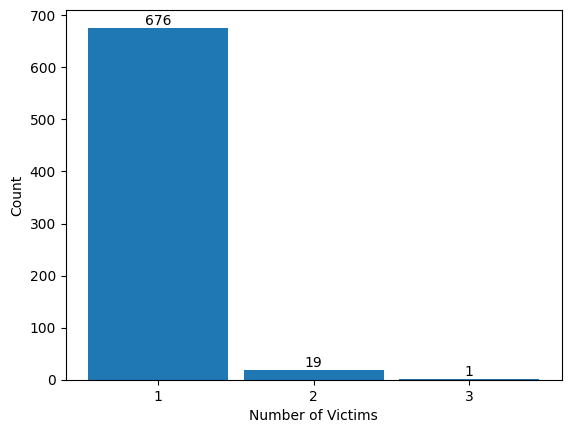

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
values, bins, bars = plt.hist(df_hom['N_VICTIMAS'],bins=[0.5,1.5,2.5,3.5],rwidth=0.9)
plt.xlabel("Number of Victims")
plt.ylabel("Count")
plt.xticks([1,2,3])
plt.bar_label(bars)
plt.show()

As expected, there are very few accidents were the number of victims is different than 1. This means we cannot make much inference with this statistic.

#### `TIPO_DE_CALLE` Column

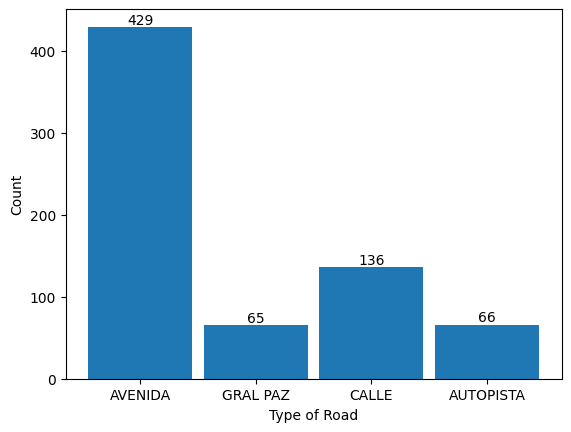

In [94]:
values, bins, bars = plt.hist(df_hom['TIPO_DE_CALLE'],bins=[-0.5,0.5,1.5,2.5,3.5],rwidth=0.9)
plt.xlabel("Type of Road")
plt.ylabel("Count")
plt.xticks(df_hom['TIPO_DE_CALLE'].unique())
plt.bar_label(bars)
plt.show()

There is not that much we can expand here, the type of road with more fatal accidents is the avenues, this without adding the General Paz Avenue data which is read independently.

#### `COMUNA` Column

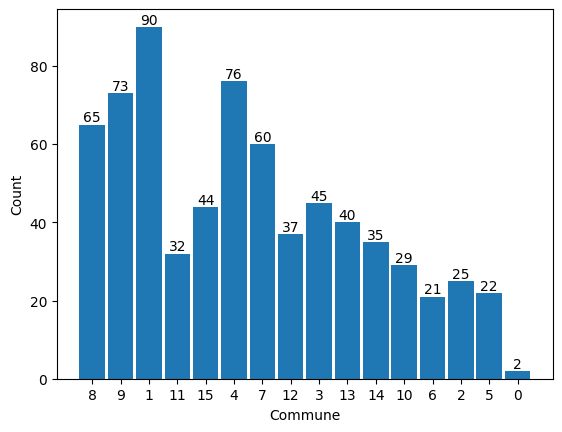

In [93]:
import numpy as np
BINS = np.arange(17) - 0.5
values, bins, bars = plt.hist(df_hom['COMUNA'],bins=BINS,rwidth=0.9)
plt.xlabel("Commune")
plt.ylabel("Count")
plt.xticks(df_hom['COMUNA'].unique())
plt.bar_label(bars)
plt.show()

There is not an evident difference between the amount of fatal accidents between the communes, however, we can pay special attention to communes 1, 4 and 9 further on.

## KPIs

### Road Accidents Homicide Rate (RAHR)

In some period of time:

- *RAH*: Number of homicides in road accidents
- *TP*: Total population

$$ RAHR = \frac{RAH}{TP} \times 100000 $$

The total population of Buenos Aires can be taken from the `PBP_CO1025.xls` Data found in [BA Data](https://data.buenosaires.gob.ar/dataset/estructura-poblacion)

In [151]:
import pandas as pd
pop = {}
for y in range(2016,2022):
    df_pop = pd.read_excel('raw_data/PBP_CO1025.xls',sheet_name=str(y))
    pop[y] = df_pop.iloc[2,1]
pop

{2016: 3059122,
 2017: 3063728,
 2018: 3068043,
 2019: 3072029,
 2020: 3075646,
 2021: 3078836}

In [163]:
df_hom['semester'] = df_hom['datetime'].dt.year.astype(str) + '_S' + (df_hom['datetime'].dt.quarter.isin([3,4]).astype(int)+1).astype(str)
df_gbsem_nvict = df_hom[['N_VICTIMAS','semester']].groupby('semester').sum()
sem = df_gbsem_nvict.index.values
RAH_bySEM = df_gbsem_nvict['N_VICTIMAS'].values
RAHR_bySEM = []
for i in range(len(sem)):
    s = sem[i]
    sy = int(s[0:4])
    tp = pop[sy]
    RAHR_bySEM.append(RAH_bySEM[i]/tp*100000)

df_RAHR_bySEM = pd.DataFrame({'semester':sem,'RAHR':RAHR_bySEM})
df_RAHR_bySEM['RAHR_PC'] = df_RAHR_bySEM['RAHR'].pct_change()
df_RAHR_bySEM

,semester,RAHR,RAHR_PC
0,2016_S1,2.124793,NaN
1,2016_S2,2.647819,0.246154
2,2017_S1,2.252158,-0.149429
3,2017_S2,2.317438,0.028986
4,2018_S1,2.281585,-0.015471
5,2018_S2,2.574931,0.128571
6,2019_S1,1.855451,-0.279417
7,2019_S2,1.529933,-0.175439
8,2020_S1,1.007918,-0.341201
9,2020_S2,1.625675,0.612903


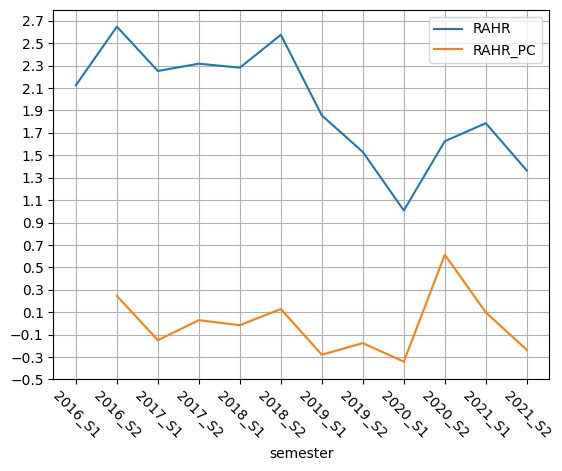

In [175]:
import matplotlib.pyplot as plt
df_RAHR_bySEM.plot(x='semester',y=['RAHR','RAHR_PC'])
plt.yticks(np.arange(-0.5,2.9,0.2))
plt.xticks(range(0,12),df_RAHR_bySEM['semester'].values,rotation=-45)
plt.grid()

### Road Accidents Homicides with Motorbikes (RAHM)

In some period of time:

- *RAHM*: The amount of homicides in road accidents involving at least 1 motorbike

In [181]:
df_hom['VICTIMA'].unique(),df_hom['ACUSADO'].unique()

(array(['MOTO', 'AUTO', 'PEATON', nan, 'CARGAS', 'BICICLETA', 'PASAJEROS',
        'MOVIL', 'OBJETO FIJO', 'PEATON_MOTO'], dtype=object),
 array(['AUTO', 'PASAJEROS', nan, 'OBJETO FIJO', 'CARGAS', 'MOTO',
        'MULTIPLE', 'OTRO', 'BICICLETA', 'TREN'], dtype=object))

In [192]:
df_gbyear_mbhom = (df_hom[(df_hom['VICTIMA']=='MOTO') | (df_hom['VICTIMA']=='PEATON_MOTO') |(df_hom['ACUSADO']=='MOTO')])['N_VICTIMAS'].groupby(df_hom['datetime'].dt.year).count()
years = df_gbyear_mbhom.index.values
RAHM_byY = df_gbyear_mbhom.values
df_RAHM_byY = pd.DataFrame({'year':years,'RAHM':RAHM_byY})
df_RAHM_byY['RAHM_PC'] = df_RAHM_byY['RAHM'].pct_change()*100
df_RAHM_byY

,year,RAHM,RAHM_PC
0,2016,68,NaN
1,2017,59,-13.235294
2,2018,63,6.779661
3,2019,54,-14.285714
4,2020,35,-35.185185
5,2021,48,37.142857


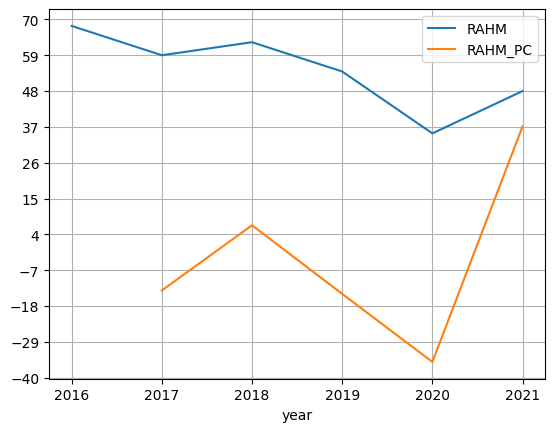

In [197]:
import matplotlib.pyplot as plt
df_RAHM_byY.plot(x='year',y=['RAHM','RAHM_PC'])
plt.yticks(np.arange(-40,71,11))
plt.grid()